In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# The Palmer Penguins dataset
url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv"

# Load the dataset into a DataFrame
penguins = pd.read_csv(url)

# Visualize and print out information about the dataset before preprocessing
print("Initial Dataset Info:")
print(penguins.info())
print("\nSample Data:")
print(penguins.head())

# Data Preprocessing: Handle missing values by dropping rows with NaNs
penguins_cleaned = penguins.dropna()

# Select features and target
X = penguins_cleaned[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
y = penguins_cleaned["species"]

# Encode the target variable (species) into numerical categories
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Confirm splits created
print("\nDataset Split:")
print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

# keep track of data
preprocessed_data = {
    "X_train": X_train,
    "X_val": X_val,
    "X_test": X_test,
    "y_train": y_train,
    "y_val": y_val,
    "y_test": y_test,
    "label_encoder": label_encoder
}

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB
None

Sample Data:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torge

Preprocessed Features (Scaled):
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       -0.639653       0.373872          -0.998018    -1.252549
1        0.953622       0.526444          -0.426373     0.239977
2        1.612908       1.441880           0.288183     0.426543
3       -1.170744      -0.083846          -1.140929    -0.755041
4        0.605666      -0.948425           1.502928     1.297183

Encoded Target Values (Train):
[0 1 1 0 2 0 2 2 0 2]

Class Distribution in Training Data:
Adelie: 98
Chinstrap: 45
Gentoo: 90


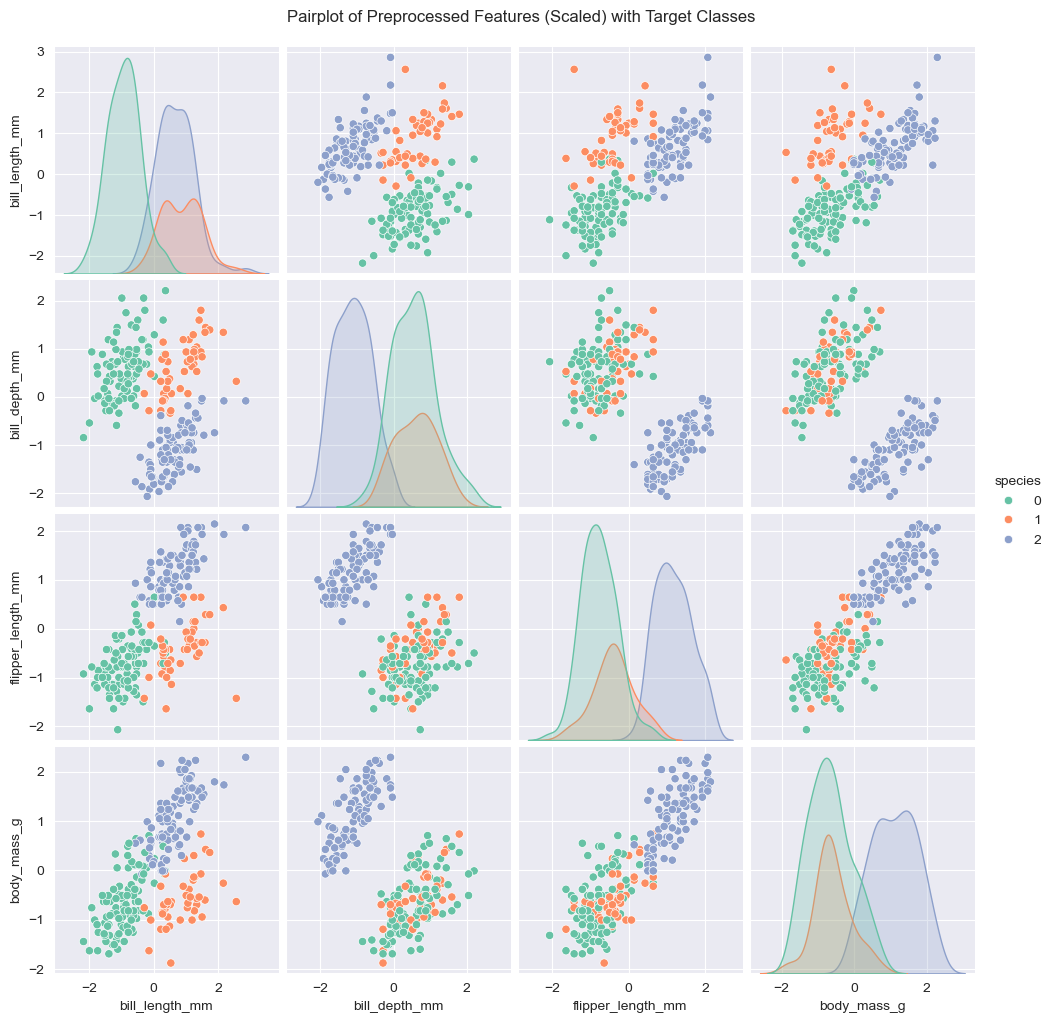

In [2]:
# Visualize the scaled features and encoded target
print("Preprocessed Features (Scaled):")
print(pd.DataFrame(preprocessed_data["X_train"], columns=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]).head())

print("\nEncoded Target Values (Train):")
print(preprocessed_data["y_train"][:10])

# Display class distribution in the target variable
unique, counts = np.unique(preprocessed_data["y_train"], return_counts=True)
class_distribution = dict(zip(unique, counts))
print("\nClass Distribution in Training Data:")
for label, count in class_distribution.items():
    class_name = preprocessed_data["label_encoder"].inverse_transform([label])[0]
    print(f"{class_name}: {count}")

# Scatter plot for initial visualizations
import seaborn as sns

# Create a DataFrame for visualization
visualization_df = pd.DataFrame(preprocessed_data["X_train"], columns=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"])
visualization_df["species"] = preprocessed_data["y_train"]

# Pairplot to show relationships between features
sns.pairplot(visualization_df, hue="species", palette="Set2", diag_kind="kde")
plt.suptitle("Pairplot of Preprocessed Features (Scaled) with Target Classes", y=1.02)
plt.show()


In [3]:
# Implementation of activation functions and their derivatives

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid activation function
def sigmoid_derivative(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Derivative of the ReLU activation function
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Softmax activation function
def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

# Test the activation functions
test_input = np.array([[1.0, -1.0, 0.5], [-0.5, 2.0, 0.0]])

print("Sigmoid Output:\n", sigmoid(test_input))
print("\nSigmoid Derivative Output:\n", sigmoid_derivative(test_input))

print("\nReLU Output:\n", relu(test_input))
print("\nReLU Derivative Output:\n", relu_derivative(test_input))

print("\nSoftmax Output:\n", softmax(test_input))


Sigmoid Output:
 [[0.73105858 0.26894142 0.62245933]
 [0.37754067 0.88079708 0.5       ]]

Sigmoid Derivative Output:
 [[0.19661193 0.19661193 0.23500371]
 [0.23500371 0.10499359 0.25      ]]

ReLU Output:
 [[1.  0.  0.5]
 [0.  2.  0. ]]

ReLU Derivative Output:
 [[1 0 1]
 [0 1 0]]

Softmax Output:
 [[0.57409699 0.07769558 0.34820743]
 [0.06742536 0.82140902 0.11116562]]



Running experiment with sigmoid activation...

Epoch 1/500 - Loss: 0.2157
Epoch 2/500 - Loss: 0.2145
Epoch 3/500 - Loss: 0.2134
Epoch 4/500 - Loss: 0.2122
Epoch 5/500 - Loss: 0.2110
Epoch 6/500 - Loss: 0.2098
Epoch 7/500 - Loss: 0.2087
Epoch 8/500 - Loss: 0.2075
Epoch 9/500 - Loss: 0.2064
Epoch 10/500 - Loss: 0.2053
Epoch 11/500 - Loss: 0.2041
Epoch 12/500 - Loss: 0.2030
Epoch 13/500 - Loss: 0.2019
Epoch 14/500 - Loss: 0.2008
Epoch 15/500 - Loss: 0.1997
Epoch 16/500 - Loss: 0.1986
Epoch 17/500 - Loss: 0.1976
Epoch 18/500 - Loss: 0.1965
Epoch 19/500 - Loss: 0.1954
Epoch 20/500 - Loss: 0.1944
Epoch 21/500 - Loss: 0.1933
Epoch 22/500 - Loss: 0.1923
Epoch 23/500 - Loss: 0.1913
Epoch 24/500 - Loss: 0.1903
Epoch 25/500 - Loss: 0.1892
Epoch 26/500 - Loss: 0.1882
Epoch 27/500 - Loss: 0.1872
Epoch 28/500 - Loss: 0.1863
Epoch 29/500 - Loss: 0.1853
Epoch 30/500 - Loss: 0.1843
Epoch 31/500 - Loss: 0.1833
Epoch 32/500 - Loss: 0.1824
Epoch 33/500 - Loss: 0.1814
Epoch 34/500 - Loss: 0.1805
Epoch 35/

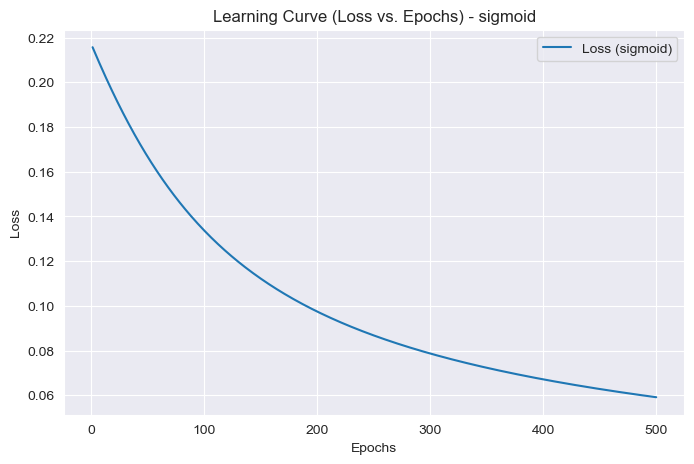


Running experiment with relu activation...

Epoch 1/500 - Loss: 0.2206
Epoch 2/500 - Loss: 0.2173
Epoch 3/500 - Loss: 0.2140
Epoch 4/500 - Loss: 0.2110
Epoch 5/500 - Loss: 0.2079
Epoch 6/500 - Loss: 0.2050
Epoch 7/500 - Loss: 0.2021
Epoch 8/500 - Loss: 0.1993
Epoch 9/500 - Loss: 0.1965
Epoch 10/500 - Loss: 0.1938
Epoch 11/500 - Loss: 0.1911
Epoch 12/500 - Loss: 0.1885
Epoch 13/500 - Loss: 0.1859
Epoch 14/500 - Loss: 0.1834
Epoch 15/500 - Loss: 0.1809
Epoch 16/500 - Loss: 0.1785
Epoch 17/500 - Loss: 0.1761
Epoch 18/500 - Loss: 0.1738
Epoch 19/500 - Loss: 0.1715
Epoch 20/500 - Loss: 0.1693
Epoch 21/500 - Loss: 0.1671
Epoch 22/500 - Loss: 0.1650
Epoch 23/500 - Loss: 0.1629
Epoch 24/500 - Loss: 0.1609
Epoch 25/500 - Loss: 0.1589
Epoch 26/500 - Loss: 0.1570
Epoch 27/500 - Loss: 0.1551
Epoch 28/500 - Loss: 0.1532
Epoch 29/500 - Loss: 0.1514
Epoch 30/500 - Loss: 0.1497
Epoch 31/500 - Loss: 0.1479
Epoch 32/500 - Loss: 0.1463
Epoch 33/500 - Loss: 0.1446
Epoch 34/500 - Loss: 0.1430
Epoch 35/500

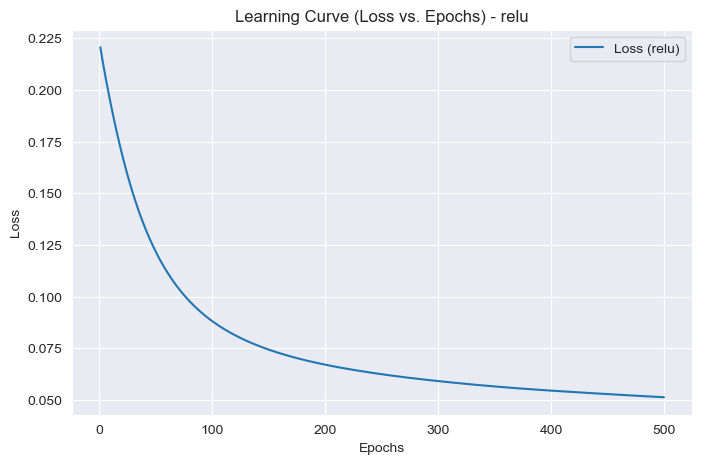

In [4]:
# Implementation of the Perceptron class
class Perceptron:
    def __init__(self, input_size, num_classes, learning_rate=0.01, activation="sigmoid"):
        self.weights = np.random.randn(input_size, num_classes) * 0.01  # Initialize weights
        self.biases = np.zeros((1, num_classes))  # Initialize biases
        self.learning_rate = learning_rate
        self.activation = activation
        self.loss_history = []  # Track loss over epochs

    def activate(self, x):
        # Allow multiple activation functions
        if self.activation == "sigmoid":
            return sigmoid(x)
        elif self.activation == "relu":
            return relu(x)
        else:
            raise ValueError(f"Unsupported activation function: {self.activation}")

    def activate_derivative(self, x):
        # Derivatives of the chosen activation
        if self.activation == "sigmoid":
            return sigmoid_derivative(x)
        elif self.activation == "relu":
            return relu_derivative(x)
        else:
            raise ValueError(f"Derivative not defined for activation: {self.activation}")

    def forward(self, x):
        # Linear transformation
        z = np.dot(x, self.weights) + self.biases
        # Apply softmax for multi-class output
        return softmax(z), z

    def train(self, x_train, y_train, epochs):
        # One-hot encoding of y_train
        y_train_one_hot = np.eye(np.max(y_train) + 1)[y_train]

        for epoch in range(epochs):
            # Forward pass
            a, z = self.forward(x_train)

            # Compute loss (Mean Squared Error)
            loss = np.mean((a - y_train_one_hot) ** 2)
            self.loss_history.append(loss)  # Store loss for visualization

            # Backward pass
            dz = 2 * (a - y_train_one_hot) * self.activate_derivative(z)
            dw = np.dot(x_train.T, dz) / x_train.shape[0]
            db = np.sum(dz, axis=0, keepdims=True) / x_train.shape[0]

            # Update weights and biases
            self.weights -= self.learning_rate * dw
            self.biases -= self.learning_rate * db

            # Print progress
            print(f"Epoch {epoch + 1}/{epochs} - Loss: {loss:.4f}")

    def predict(self, x):
        # Predict class labels
        z = np.dot(x, self.weights) + self.biases
        a = softmax(z)
        return np.argmax(a, axis=1)

# Experiment 1: Train the perceptron with sigmoid and relu activations
input_size = preprocessed_data["X_train"].shape[1]
num_classes = len(np.unique(preprocessed_data["y_train"]))
learning_rate = 0.01
epochs = 500

# Function to train and evaluate the perceptron for a given activation function
def run_experiment(activation_function):
    print(f"\nRunning experiment with {activation_function} activation...\n")

    # Initialize the perceptron
    perceptron = Perceptron(input_size, num_classes, learning_rate, activation=activation_function)

    # Train the perceptron
    perceptron.train(preprocessed_data["X_train"], preprocessed_data["y_train"], epochs)

    # Predict on the validation set
    y_pred_val = perceptron.predict(preprocessed_data["X_val"])

    # Evaluate the model
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support

    accuracy = accuracy_score(preprocessed_data["y_val"], y_pred_val)
    conf_matrix = confusion_matrix(preprocessed_data["y_val"], y_pred_val)

    # Compute detailed metrics
    precision, recall, f1, _ = precision_recall_fscore_support(preprocessed_data["y_val"], y_pred_val, average=None)
    class_names = preprocessed_data["label_encoder"].classes_  # Get class names

    metrics_df = pd.DataFrame({
        'Class': class_names,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

    print(f"\nValidation Accuracy ({activation_function}):", accuracy)
    print(f"\nConfusion Matrix ({activation_function}):\n", conf_matrix)
    print(f"\nDetailed Metrics ({activation_function}):\n", metrics_df)

    # Visualize learning curve (loss vs epochs)
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, epochs + 1), perceptron.loss_history, label=f"Loss ({activation_function})")
    plt.title(f"Learning Curve (Loss vs. Epochs) - {activation_function}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    # store results
    results = {
        "activation": activation_function,
        "epochs": list(range(1, epochs + 1)),
        "loss_history": perceptron.loss_history,
        "best_accuracy": accuracy,
        "confusion_matrix": conf_matrix,
        "metrics": metrics_df
    }

    return results

# Run experiments for sigmoid and relu activations
sigmoid_results = run_experiment("sigmoid")
relu_results = run_experiment("relu")

# Store results for both activations
experiment_results = {
    "sigmoid": sigmoid_results,
    "relu": relu_results
}



Hyperparameter tuning for sigmoid activation...

Training with epochs=100, learning_rate=0.01...
Epoch 1/100 - Loss: 0.2231
Epoch 2/100 - Loss: 0.2219
Epoch 3/100 - Loss: 0.2207
Epoch 4/100 - Loss: 0.2194
Epoch 5/100 - Loss: 0.2182
Epoch 6/100 - Loss: 0.2170
Epoch 7/100 - Loss: 0.2158
Epoch 8/100 - Loss: 0.2146
Epoch 9/100 - Loss: 0.2134
Epoch 10/100 - Loss: 0.2122
Epoch 11/100 - Loss: 0.2111
Epoch 12/100 - Loss: 0.2099
Epoch 13/100 - Loss: 0.2087
Epoch 14/100 - Loss: 0.2076
Epoch 15/100 - Loss: 0.2064
Epoch 16/100 - Loss: 0.2053
Epoch 17/100 - Loss: 0.2042
Epoch 18/100 - Loss: 0.2031
Epoch 19/100 - Loss: 0.2020
Epoch 20/100 - Loss: 0.2009
Epoch 21/100 - Loss: 0.1998
Epoch 22/100 - Loss: 0.1987
Epoch 23/100 - Loss: 0.1976
Epoch 24/100 - Loss: 0.1965
Epoch 25/100 - Loss: 0.1955
Epoch 26/100 - Loss: 0.1944
Epoch 27/100 - Loss: 0.1934
Epoch 28/100 - Loss: 0.1923
Epoch 29/100 - Loss: 0.1913
Epoch 30/100 - Loss: 0.1903
Epoch 31/100 - Loss: 0.1893
Epoch 32/100 - Loss: 0.1883
Epoch 33/100 - L

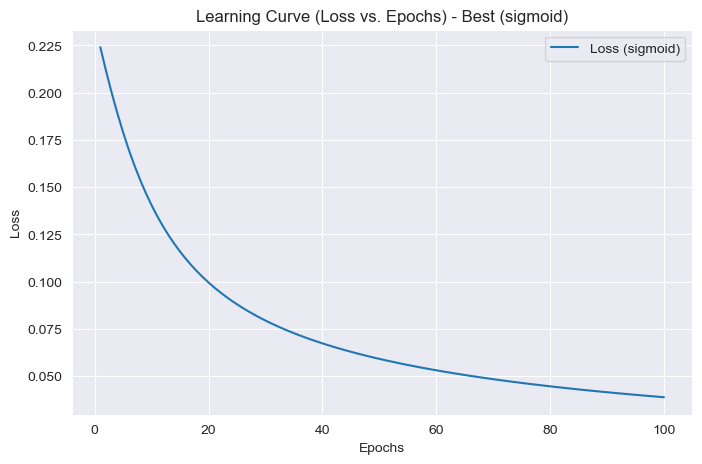

Hyperparameter tuning for relu activation...

Training with epochs=100, learning_rate=0.01...
Epoch 1/100 - Loss: 0.2230
Epoch 2/100 - Loss: 0.2207
Epoch 3/100 - Loss: 0.2176
Epoch 4/100 - Loss: 0.2142
Epoch 5/100 - Loss: 0.2110
Epoch 6/100 - Loss: 0.2078
Epoch 7/100 - Loss: 0.2048
Epoch 8/100 - Loss: 0.2017
Epoch 9/100 - Loss: 0.1987
Epoch 10/100 - Loss: 0.1958
Epoch 11/100 - Loss: 0.1929
Epoch 12/100 - Loss: 0.1901
Epoch 13/100 - Loss: 0.1874
Epoch 14/100 - Loss: 0.1846
Epoch 15/100 - Loss: 0.1820
Epoch 16/100 - Loss: 0.1794
Epoch 17/100 - Loss: 0.1768
Epoch 18/100 - Loss: 0.1743
Epoch 19/100 - Loss: 0.1718
Epoch 20/100 - Loss: 0.1694
Epoch 21/100 - Loss: 0.1670
Epoch 22/100 - Loss: 0.1647
Epoch 23/100 - Loss: 0.1625
Epoch 24/100 - Loss: 0.1602
Epoch 25/100 - Loss: 0.1581
Epoch 26/100 - Loss: 0.1560
Epoch 27/100 - Loss: 0.1539
Epoch 28/100 - Loss: 0.1518
Epoch 29/100 - Loss: 0.1498
Epoch 30/100 - Loss: 0.1479
Epoch 31/100 - Loss: 0.1460
Epoch 32/100 - Loss: 0.1441
Epoch 33/100 - Loss

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


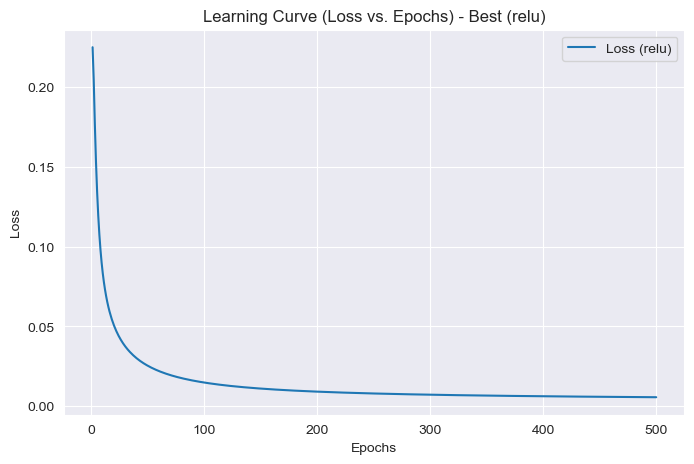

In [5]:
# Required imports
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt

# Experiment 2: Hyperparameter tuning for the perceptron
def tune_perceptron(activation_function, epochs_list, learning_rates):
    best_accuracy = 0
    best_params = {}
    all_results = []

    print(f"Hyperparameter tuning for {activation_function} activation...\n")

    for epochs in epochs_list:
        for learning_rate in learning_rates:
            print(f"Training with epochs={epochs}, learning_rate={learning_rate}...")

            # Initialize the perceptron
            perceptron = Perceptron(input_size, num_classes, learning_rate, activation=activation_function)

            # Train the perceptron
            perceptron.train(preprocessed_data["X_train"], preprocessed_data["y_train"], epochs)

            # Predict on the validation set
            y_pred_val = perceptron.predict(preprocessed_data["X_val"])

            # Evaluate the model
            accuracy = accuracy_score(preprocessed_data["y_val"], y_pred_val)
            conf_matrix = confusion_matrix(preprocessed_data["y_val"], y_pred_val)

            # Compute metrics
            precision, recall, f1, _ = precision_recall_fscore_support(preprocessed_data["y_val"], y_pred_val, average=None)
            class_names = preprocessed_data["label_encoder"].classes_  # Get class names

            metrics_df = pd.DataFrame({
                'Class': class_names,
                'Precision': precision,
                'Recall': recall,
                'F1-Score': f1
            })

            print(f"Validation Accuracy: {accuracy:.4f}")
            print(f"Confusion Matrix:\n{conf_matrix}")
            print(f"Detailed Metrics:\n{metrics_df}")

            # store results for this config
            results = {
                "activation": activation_function,
                "epochs": epochs,
                "learning_rate": learning_rate,
                "accuracy": accuracy,
                "loss_history": perceptron.loss_history,
                "confusion_matrix": conf_matrix,
                "metrics": metrics_df
            }
            all_results.append(results)

            # Update best results
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {
                    "activation": activation_function,
                    "epochs": epochs,
                    "learning_rate": learning_rate
                }
                best_results = results

    # Print the best config
    print(f"\nBest Parameters for {activation_function} Activation:")
    print(f"Epochs: {best_params['epochs']}, Learning Rate: {best_params['learning_rate']}, Accuracy: {best_accuracy:.4f}")

    # Visualize learning curve for the best config
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, best_results["epochs"] + 1), best_results["loss_history"], label=f"Loss ({activation_function})")
    plt.title(f"Learning Curve (Loss vs. Epochs) - Best ({activation_function})")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    return best_results, all_results

# Hyperparameter values
epochs_list = [100, 500, 1000]
learning_rates = [0.01, 0.001, 0.1]

# Run hyperparameter tuning for sigmoid and relu activations
best_sigmoid_results, sigmoid_all_results = tune_perceptron("sigmoid", epochs_list, learning_rates)
best_relu_results, relu_all_results = tune_perceptron("relu", epochs_list, learning_rates)

# Store the best results for both activations
tuned_results = {
    "sigmoid": best_sigmoid_results,
    "relu": best_relu_results
}




Training the MLP...
Epoch 1/500 - Loss: 1.3022
Epoch 10/500 - Loss: 0.6319
Epoch 20/500 - Loss: 0.4074
Epoch 30/500 - Loss: 0.3076
Epoch 40/500 - Loss: 0.2513
Epoch 50/500 - Loss: 0.2146
Epoch 60/500 - Loss: 0.1885
Epoch 70/500 - Loss: 0.1687
Epoch 80/500 - Loss: 0.1531
Epoch 90/500 - Loss: 0.1406
Epoch 100/500 - Loss: 0.1303
Epoch 110/500 - Loss: 0.1215
Epoch 120/500 - Loss: 0.1140
Epoch 130/500 - Loss: 0.1074
Epoch 140/500 - Loss: 0.1016
Epoch 150/500 - Loss: 0.0966
Epoch 160/500 - Loss: 0.0920
Epoch 170/500 - Loss: 0.0880
Epoch 180/500 - Loss: 0.0844
Epoch 190/500 - Loss: 0.0811
Epoch 200/500 - Loss: 0.0781
Epoch 210/500 - Loss: 0.0753
Epoch 220/500 - Loss: 0.0728
Epoch 230/500 - Loss: 0.0704
Epoch 240/500 - Loss: 0.0683
Epoch 250/500 - Loss: 0.0663
Epoch 260/500 - Loss: 0.0644
Epoch 270/500 - Loss: 0.0627
Epoch 280/500 - Loss: 0.0611
Epoch 290/500 - Loss: 0.0596
Epoch 300/500 - Loss: 0.0581
Epoch 310/500 - Loss: 0.0568
Epoch 320/500 - Loss: 0.0555
Epoch 330/500 - Loss: 0.0543
Epoc

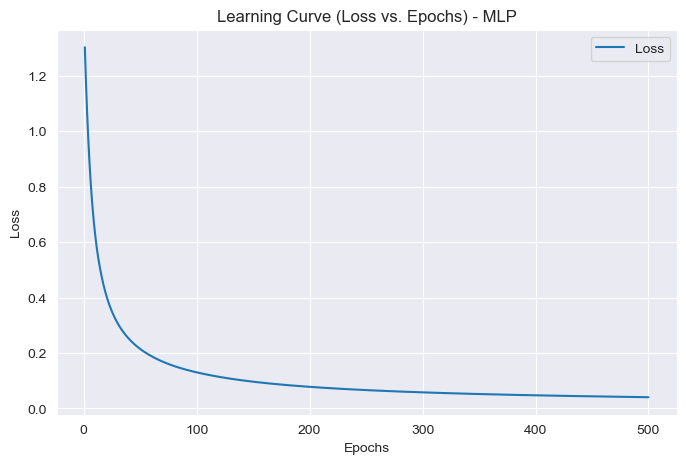


Results stored in 'mlp_results' for further analysis.


In [6]:
# MLP implementation
class MLP:
    def __init__(self, architecture, learning_rate=0.01):
        self.weights = []
        self.biases = []
        self.lr = learning_rate

        # Initialize weights and biases based on the architecture
        for i in range(len(architecture) - 1):
            self.weights.append(np.random.randn(architecture[i], architecture[i + 1]) * np.sqrt(2.0 / architecture[i]))
            self.biases.append(np.zeros((1, architecture[i + 1])))

    def forward(self, X):
        self.activations = [X]
        self.z_values = []

        # Forward propagation through hidden layers
        for i in range(len(self.weights) - 1):
            z = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
            self.z_values.append(z)
            a = relu(z)  # Use ReLU for hidden layers
            self.activations.append(a)

        # Forward propagation through output layer
        z = np.dot(self.activations[-1], self.weights[-1]) + self.biases[-1]
        self.z_values.append(z)
        output = softmax(z)  # Use softmax for output layer
        self.activations.append(output)

        return output

    def backward(self, X, y):
        m = X.shape[0]
        y_one_hot = np.zeros((m, self.weights[-1].shape[1]))
        y_one_hot[range(m), y] = 1
        delta = self.activations[-1] - y_one_hot

        gradients = []
        # Backpropagation
        for i in range(len(self.weights) - 1, -1, -1):
            dW = np.dot(self.activations[i].T, delta) / m
            db = np.sum(delta, axis=0, keepdims=True) / m

            gradients.insert(0, (dW, db))

            if i > 0:
                delta = np.dot(delta, self.weights[i].T)
                delta *= relu_derivative(self.z_values[i - 1])

        return gradients

    def train_step(self, X, y):
        # Forward pass
        output = self.forward(X)

        # Compute loss (cross-entropy)
        m = X.shape[0]
        loss = -np.sum(np.log(output[range(m), y] + 1e-10)) / m

        # Backward pass
        gradients = self.backward(X, y)

        # Update parameters
        for i, (dW, db) in enumerate(gradients):
            self.weights[i] -= self.lr * dW
            self.biases[i] -= self.lr * db

        return loss

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the architecture for the MLP
architecture = [preprocessed_data["X_train"].shape[1], 32, 16, num_classes]
learning_rate = 0.01
epochs = 500

# Initialize the MLP with the architecture
mlp = MLP(architecture, learning_rate)

# Training the MLP
print("\nTraining the MLP...")
loss_history = []
for epoch in range(epochs):
    loss = mlp.train_step(preprocessed_data["X_train"], preprocessed_data["y_train"])
    loss_history.append(loss)

    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch + 1}/{epochs} - Loss: {loss:.4f}")

# Validation
y_pred_val = mlp.predict(preprocessed_data["X_val"])

# Evaluate the model
accuracy = accuracy_score(preprocessed_data["y_val"], y_pred_val)
conf_matrix = confusion_matrix(preprocessed_data["y_val"], y_pred_val)

print("\nValidation Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(preprocessed_data["y_val"], y_pred_val))

# Visualize learning curve (loss vs epochs)
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), loss_history, label="Loss")
plt.title("Learning Curve (Loss vs. Epochs) - MLP")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Store results for later analysis
mlp_results = {
    "architecture": architecture,
    "epochs": list(range(1, epochs + 1)),
    "loss_history": loss_history,
    "best_accuracy": accuracy,
    "confusion_matrix": conf_matrix
}

print("\nResults stored in 'mlp_results' for further analysis.")




Hyperparameter tuning for MLP...


Testing architecture: [4, 32, 16, 3]

Training with epochs=100, learning_rate=0.01...
Validation Accuracy: 1.0000
Confusion Matrix:
[[22  0  0]
 [ 0 10  0]
 [ 0  0 18]]
Detailed Metrics:
       Class  Precision  Recall  F1-Score
0     Adelie        1.0     1.0       1.0
1  Chinstrap        1.0     1.0       1.0
2     Gentoo        1.0     1.0       1.0
Training with epochs=100, learning_rate=0.001...
Validation Accuracy: 0.0400
Confusion Matrix:
[[ 0 22  0]
 [ 0  1  9]
 [ 1 16  1]]
Detailed Metrics:
       Class  Precision    Recall  F1-Score
0     Adelie   0.000000  0.000000  0.000000
1  Chinstrap   0.025641  0.100000  0.040816
2     Gentoo   0.100000  0.055556  0.071429
Training with epochs=100, learning_rate=0.1...
Validation Accuracy: 1.0000
Confusion Matrix:
[[22  0  0]
 [ 0 10  0]
 [ 0  0 18]]
Detailed Metrics:
       Class  Precision  Recall  F1-Score
0     Adelie        1.0     1.0       1.0
1  Chinstrap        1.0     1.0       1.0
2     Gent

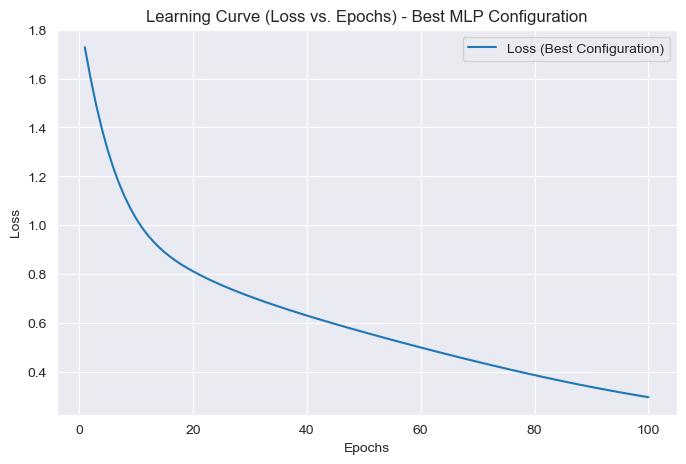

In [7]:
# Function to train and evaluate the MLP with different hyperparameters
def tune_mlp(architectures, epochs_list, learning_rates):
    best_accuracy = 0
    best_params = {}
    all_results = []
    best_results = {}

    print(f"Hyperparameter tuning for MLP...\n")

    for architecture in architectures:
        print(f"\nTesting architecture: {architecture}\n")
        for epochs in epochs_list:
            for learning_rate in learning_rates:
                print(f"Training with epochs={epochs}, learning_rate={learning_rate}...")

                # Initialize the MLP
                mlp = MLP(architecture, learning_rate)

                # Train the MLP
                loss_history = []
                for epoch in range(epochs):
                    loss = mlp.train_step(preprocessed_data["X_train"], preprocessed_data["y_train"])
                    loss_history.append(loss)

                # Predict on the validation set
                y_pred_val = mlp.predict(preprocessed_data["X_val"])

                # Evaluate the model
                from sklearn.metrics import precision_recall_fscore_support

                accuracy = accuracy_score(preprocessed_data["y_val"], y_pred_val)
                conf_matrix = confusion_matrix(preprocessed_data["y_val"], y_pred_val)

                # Compute metrics
                precision, recall, f1, _ = precision_recall_fscore_support(
                    preprocessed_data["y_val"],
                    y_pred_val,
                    labels=np.arange(len(preprocessed_data["label_encoder"].classes_)),  # Include all classes
                    zero_division=0
                )
                class_names = preprocessed_data["label_encoder"].classes_  # Get class names

                metrics_df = pd.DataFrame({
                    'Class': class_names,
                    'Precision': precision,
                    'Recall': recall,
                    'F1-Score': f1
                })

                print(f"Validation Accuracy: {accuracy:.4f}")
                print(f"Confusion Matrix:\n{conf_matrix}")
                print(f"Detailed Metrics:\n{metrics_df}")

                # Save results for this config
                results = {
                    "architecture": architecture,
                    "epochs": epochs,
                    "learning_rate": learning_rate,
                    "accuracy": accuracy,
                    "loss_history": loss_history,
                    "confusion_matrix": conf_matrix,
                    "metrics": metrics_df
                }
                all_results.append(results)

                # Update best results
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {
                        "architecture": architecture,
                        "epochs": epochs,
                        "learning_rate": learning_rate
                    }
                    best_results = results

    # Handle the case where no configuration improves best_accuracy
    if not best_results:
        print("No configuration resulted in an improvement. Check your data or hyperparameters.")
        return None, all_results

    # Print the best configuration
    print(f"\nBest Parameters for MLP:")
    print(f"Architecture: {best_params['architecture']}, Epochs: {best_params['epochs']}, Learning Rate: {best_params['learning_rate']}, Accuracy: {best_accuracy:.4f}")

    # Visualize learning curve for the best configuration
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(best_results["loss_history"]) + 1), best_results["loss_history"], label="Loss (Best Configuration)")
    plt.title(f"Learning Curve (Loss vs. Epochs) - Best MLP Configuration")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    return best_results, all_results


    # Handle the case where no configuration improves best_accuracy
    if not best_results:
        print("No configuration resulted in an improvement. Check your data or hyperparameters.")
        return None, all_results

    # Print the best configuration
    print(f"\nBest Parameters for MLP:")
    print(f"Architecture: {best_params['architecture']}, Epochs: {best_params['epochs']}, Learning Rate: {best_params['learning_rate']}, Accuracy: {best_accuracy:.4f}")

    # Visualize learning curve for the best configuration
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(best_results["loss_history"]) + 1), best_results["loss_history"], label="Loss (Best Configuration)")
    plt.title(f"Learning Curve (Loss vs. Epochs) - Best MLP Configuration")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    return best_results, all_results

# Hyperparameter values
architectures = [
    [preprocessed_data["X_train"].shape[1], 32, 16, num_classes],
    [preprocessed_data["X_train"].shape[1], 64, 32, num_classes],
    [preprocessed_data["X_train"].shape[1], 128, 64, 32, num_classes],
    [preprocessed_data["X_train"].shape[1], 16, 8, num_classes]
]
epochs_list = [100, 500, 1000]
learning_rates = [0.01, 0.001, 0.1]

# Run hyperparameter tuning for MLP
best_mlp_results, mlp_all_results = tune_mlp(architectures, epochs_list, learning_rates)

# Store the best results
tuned_mlp_results = {
    "best": best_mlp_results,
    "all_results": mlp_all_results
}


In [8]:
# function to perform kfold cross validation
def kfold_cv(model_class, X, y, k, model_params, hyperparams=None):
    from sklearn.model_selection import KFold
    from sklearn.metrics import accuracy_score, confusion_matrix

    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    fold_results = []
    all_loss_histories = []
    fold_index = 1

    print(f"K-Fold Cross-Validation for {model_class.__name__}...\n")

    for train_idx, val_idx in kfold.split(X):
        print(f"Fold {fold_index}/{k}")

        # Split the data
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        # Initialize the model
        if hyperparams:
            best_params = hyperparams
            if model_class.__name__ == "Perceptron":
                model = model_class(
                    input_size=model_params["input_size"],
                    num_classes=model_params["num_classes"],
                    learning_rate=best_params["learning_rate"],
                    activation=model_params["activation"]
                )
            elif model_class.__name__ == "MLP":
                model = model_class(
                    architecture=best_params["architecture"],
                    learning_rate=best_params["learning_rate"]
                )
        else:
            if model_class.__name__ == "Perceptron":
                model = model_class(
                    input_size=model_params["input_size"],
                    num_classes=model_params["num_classes"],
                    learning_rate=model_params["learning_rate"],
                    activation=model_params["activation"]
                )
            elif model_class.__name__ == "MLP":
                model = model_class(
                    architecture=model_params["architecture"],
                    learning_rate=model_params["learning_rate"]
                )

        # Train the model
        loss_history = []
        if model_class.__name__ == "Perceptron":
            # Use the Perceptron's train method
            model.train(X_train, y_train, model_params["epochs"])
            loss_history = model.loss_history
        elif model_class.__name__ == "MLP":
            # Use the MLP's train_step method
            for epoch in range(model_params["epochs"]):
                loss = model.train_step(X_train, y_train)
                loss_history.append(loss)

        # Predict on validation set
        y_pred_val = model.predict(X_val)

        # Evaluate the model
        accuracy = accuracy_score(y_val, y_pred_val)
        conf_matrix = confusion_matrix(y_val, y_pred_val)

        print(f"Validation Accuracy (Fold {fold_index}): {accuracy:.4f}")

        # Store results for this fold
        results = {
            "fold": fold_index,
            "accuracy": accuracy, # store accuracy
            "loss_history": loss_history, # store loss history
            "confusion_matrix": conf_matrix,  # Store confusion matrix
            "val_indices": val_idx,  # Store validation indices
            "y_pred_val": y_pred_val  # Store predictions
        }
        fold_results.append(results)
        all_loss_histories.append(loss_history)

        fold_index += 1

    # Calculate average accuracy across folds
    avg_accuracy = np.mean([result["accuracy"] for result in fold_results])
    print(f"\nAverage Accuracy across {k} folds: {avg_accuracy:.4f}")

    return fold_results, all_loss_histories



K-Fold CV for Perceptron:
K-Fold Cross-Validation for Perceptron...

Fold 1/5
Epoch 1/500 - Loss: 0.2203
Epoch 2/500 - Loss: 0.2191
Epoch 3/500 - Loss: 0.2178
Epoch 4/500 - Loss: 0.2165
Epoch 5/500 - Loss: 0.2153
Epoch 6/500 - Loss: 0.2141
Epoch 7/500 - Loss: 0.2128
Epoch 8/500 - Loss: 0.2116
Epoch 9/500 - Loss: 0.2104
Epoch 10/500 - Loss: 0.2092
Epoch 11/500 - Loss: 0.2080
Epoch 12/500 - Loss: 0.2068
Epoch 13/500 - Loss: 0.2057
Epoch 14/500 - Loss: 0.2045
Epoch 15/500 - Loss: 0.2033
Epoch 16/500 - Loss: 0.2022
Epoch 17/500 - Loss: 0.2010
Epoch 18/500 - Loss: 0.1999
Epoch 19/500 - Loss: 0.1988
Epoch 20/500 - Loss: 0.1977
Epoch 21/500 - Loss: 0.1966
Epoch 22/500 - Loss: 0.1955
Epoch 23/500 - Loss: 0.1944
Epoch 24/500 - Loss: 0.1933
Epoch 25/500 - Loss: 0.1922
Epoch 26/500 - Loss: 0.1911
Epoch 27/500 - Loss: 0.1901
Epoch 28/500 - Loss: 0.1890
Epoch 29/500 - Loss: 0.1880
Epoch 30/500 - Loss: 0.1870
Epoch 31/500 - Loss: 0.1859
Epoch 32/500 - Loss: 0.1849
Epoch 33/500 - Loss: 0.1839
Epoch 

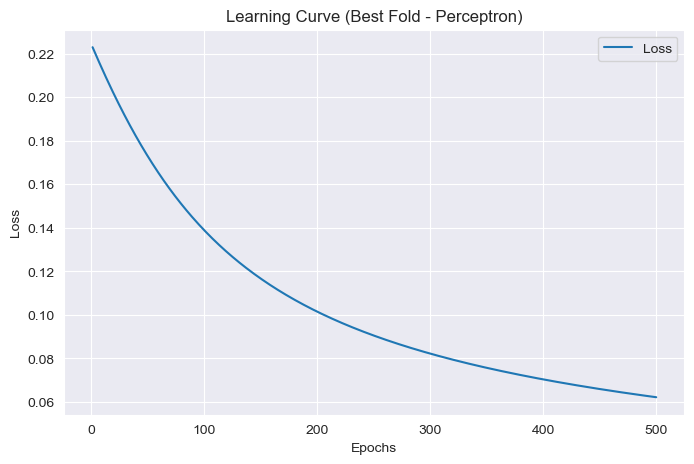


K-Fold CV results for Basic Perceptron stored in 'kfold_results_perceptron'.


In [9]:
# K-Fold CV for Basic Perceptron
print("\nK-Fold CV for Perceptron:")

perceptron_fold_results, perceptron_loss_histories = kfold_cv(
    Perceptron,
    preprocessed_data["X_train"],
    preprocessed_data["y_train"],
    k=5,
    model_params={
        "input_size": preprocessed_data["X_train"].shape[1],
        "num_classes": num_classes,
        "learning_rate": 0.01,
        "epochs": 500,
        "activation": "sigmoid"
    }
)

# Identify the best fold based on accuracy
best_fold = max(perceptron_fold_results, key=lambda x: x["accuracy"])

# Compute metrics for the best fold
from sklearn.metrics import precision_recall_fscore_support

y_val_true = preprocessed_data["y_train"][best_fold["val_indices"]]
y_val_pred = best_fold["y_pred_val"]

precision, recall, f1, _ = precision_recall_fscore_support(
    y_val_true,
    y_val_pred,
    labels=np.arange(len(preprocessed_data["label_encoder"].classes_)),
    zero_division=0
)
class_names = preprocessed_data["label_encoder"].classes_

# Create a DataFrame for detailed metrics
metrics_df = pd.DataFrame({
    'Class': class_names,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

print("\nBest Fold Metrics (Basic Perceptron):")
print(f"Fold: {best_fold['fold']}")
print(f"Accuracy: {best_fold['accuracy']:.4f}")
print(f"Confusion Matrix:\n{best_fold['confusion_matrix']}")
print("\nDetailed Metrics for Best Fold:\n", metrics_df)

# Visualize the best fold's learning curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(best_fold["loss_history"]) + 1), best_fold["loss_history"], label="Loss")
plt.title(f"Learning Curve (Best Fold - Perceptron)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

print("\nK-Fold CV results for Basic Perceptron stored in 'kfold_results_perceptron'.")



K-Fold CV for Hyperparameter-Tuned Perceptron:
K-Fold Cross-Validation for Perceptron...

Fold 1/5
Epoch 1/500 - Loss: 0.2215
Epoch 2/500 - Loss: 0.2090
Epoch 3/500 - Loss: 0.1972
Epoch 4/500 - Loss: 0.1864
Epoch 5/500 - Loss: 0.1764
Epoch 6/500 - Loss: 0.1673
Epoch 7/500 - Loss: 0.1589
Epoch 8/500 - Loss: 0.1513
Epoch 9/500 - Loss: 0.1444
Epoch 10/500 - Loss: 0.1381
Epoch 11/500 - Loss: 0.1324
Epoch 12/500 - Loss: 0.1272
Epoch 13/500 - Loss: 0.1224
Epoch 14/500 - Loss: 0.1180
Epoch 15/500 - Loss: 0.1139
Epoch 16/500 - Loss: 0.1102
Epoch 17/500 - Loss: 0.1067
Epoch 18/500 - Loss: 0.1035
Epoch 19/500 - Loss: 0.1005
Epoch 20/500 - Loss: 0.0978
Epoch 21/500 - Loss: 0.0952
Epoch 22/500 - Loss: 0.0928
Epoch 23/500 - Loss: 0.0905
Epoch 24/500 - Loss: 0.0884
Epoch 25/500 - Loss: 0.0863
Epoch 26/500 - Loss: 0.0844
Epoch 27/500 - Loss: 0.0827
Epoch 28/500 - Loss: 0.0810
Epoch 29/500 - Loss: 0.0794
Epoch 30/500 - Loss: 0.0778
Epoch 31/500 - Loss: 0.0764
Epoch 32/500 - Loss: 0.0750
Epoch 33/500 

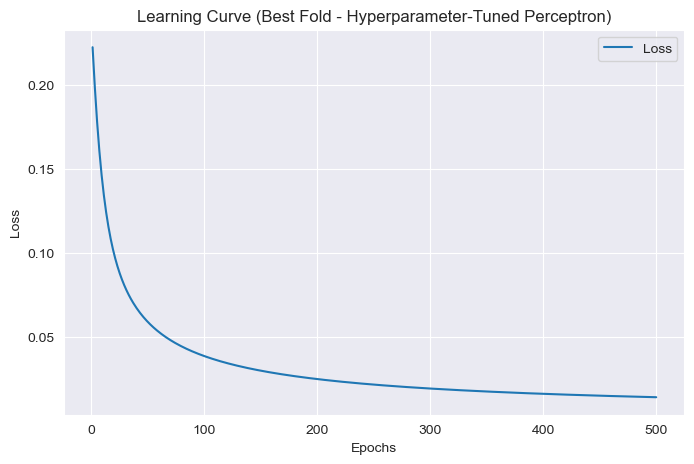


K-Fold CV results for Hyperparameter-Tuned Perceptron stored in 'kfold_results_perceptron_tuned'.


In [10]:
# K-Fold CV for Hyperparameter-Tuned Perceptron
print("\nK-Fold CV for Hyperparameter-Tuned Perceptron:")

perceptron_tuned_fold_results, perceptron_tuned_loss_histories = kfold_cv(
    Perceptron,
    preprocessed_data["X_train"],
    preprocessed_data["y_train"],
    k=5,
    model_params={
        "input_size": preprocessed_data["X_train"].shape[1],
        "num_classes": num_classes,
        "learning_rate": 0.01,
        "epochs": 500,
        "activation": "sigmoid"
    },
    hyperparams=tuned_results["sigmoid"]  # Best tuned results from previous experiments
)

# Identify the best fold based on accuracy
best_fold = max(perceptron_tuned_fold_results, key=lambda x: x["accuracy"])

# Compute detailed metrics for the best fold
from sklearn.metrics import precision_recall_fscore_support

y_val_true = preprocessed_data["y_train"][best_fold["val_indices"]]
y_val_pred = best_fold["y_pred_val"]

precision, recall, f1, _ = precision_recall_fscore_support(
    y_val_true,
    y_val_pred,
    labels=np.arange(len(preprocessed_data["label_encoder"].classes_)),
    zero_division=0
)
class_names = preprocessed_data["label_encoder"].classes_

# Create a DataFrame for detailed metrics
metrics_df = pd.DataFrame({
    'Class': class_names,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

print("\nBest Fold Metrics (Hyperparameter-Tuned Perceptron):")
print(f"Fold: {best_fold['fold']}")
print(f"Accuracy: {best_fold['accuracy']:.4f}")
print(f"Confusion Matrix:\n{best_fold['confusion_matrix']}")
print("\nDetailed Metrics for Best Fold:\n", metrics_df)

# Visualize the best fold's learning curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(best_fold["loss_history"]) + 1), best_fold["loss_history"], label="Loss")
plt.title(f"Learning Curve (Best Fold - Hyperparameter-Tuned Perceptron)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

print("\nK-Fold CV results for Hyperparameter-Tuned Perceptron stored in 'kfold_results_perceptron_tuned'.")



K-Fold CV for MLP:
K-Fold Cross-Validation for MLP...

Fold 1/5
Validation Accuracy (Fold 1): 0.9787
Fold 2/5
Validation Accuracy (Fold 2): 0.9787
Fold 3/5
Validation Accuracy (Fold 3): 1.0000
Fold 4/5
Validation Accuracy (Fold 4): 1.0000
Fold 5/5
Validation Accuracy (Fold 5): 0.9783

Average Accuracy across 5 folds: 0.9871

Best Fold Metrics (Basic MLP):
Fold: 3
Accuracy: 1.0000
Confusion Matrix:
[[17  0  0]
 [ 0  9  0]
 [ 0  0 21]]

Detailed Metrics for Best Fold:
        Class  Precision  Recall  F1-Score
0     Adelie        1.0     1.0       1.0
1  Chinstrap        1.0     1.0       1.0
2     Gentoo        1.0     1.0       1.0


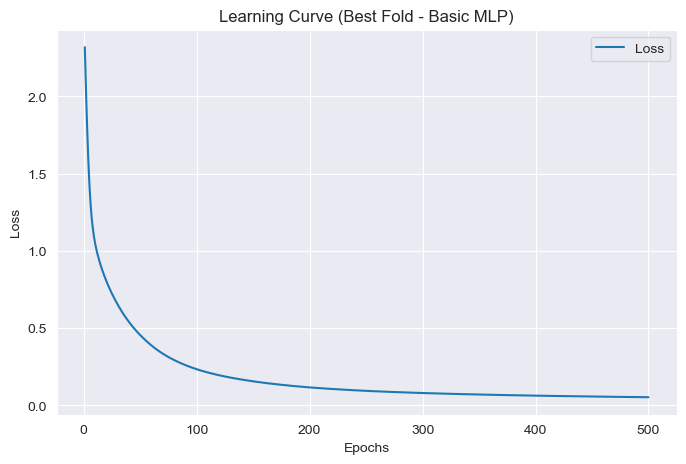


K-Fold CV results for Basic MLP stored in 'kfold_results_mlp'.


In [11]:
# K-Fold CV for Basic MLP
print("\nK-Fold CV for MLP:")

mlp_fold_results, mlp_loss_histories = kfold_cv(
    MLP,
    preprocessed_data["X_train"],
    preprocessed_data["y_train"],
    k=5,
    model_params={
        "architecture": [preprocessed_data["X_train"].shape[1], 32, 16, num_classes],
        "learning_rate": 0.01,
        "epochs": 500
    }
)

# Identify the best fold based on accuracy
best_fold = max(mlp_fold_results, key=lambda x: x["accuracy"])

# Compute metrics for the best fold
from sklearn.metrics import precision_recall_fscore_support

y_val_true = preprocessed_data["y_train"][best_fold["val_indices"]]
y_val_pred = best_fold["y_pred_val"]

precision, recall, f1, _ = precision_recall_fscore_support(
    y_val_true,
    y_val_pred,
    labels=np.arange(len(preprocessed_data["label_encoder"].classes_)),
    zero_division=0
)
class_names = preprocessed_data["label_encoder"].classes_

# Create a DataFrame for detailed metrics
metrics_df = pd.DataFrame({
    'Class': class_names,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

print("\nBest Fold Metrics (Basic MLP):")
print(f"Fold: {best_fold['fold']}")
print(f"Accuracy: {best_fold['accuracy']:.4f}")
print(f"Confusion Matrix:\n{best_fold['confusion_matrix']}")
print("\nDetailed Metrics for Best Fold:\n", metrics_df)

# Visualize the best fold's learning curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(best_fold["loss_history"]) + 1), best_fold["loss_history"], label="Loss")
plt.title(f"Learning Curve (Best Fold - Basic MLP)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

print("\nK-Fold CV results for Basic MLP stored in 'kfold_results_mlp'.")



K-Fold CV for Hyperparameter-Tuned MLP:
K-Fold Cross-Validation for MLP...

Fold 1/5
Validation Accuracy (Fold 1): 0.9787
Fold 2/5
Validation Accuracy (Fold 2): 0.9787
Fold 3/5
Validation Accuracy (Fold 3): 1.0000
Fold 4/5
Validation Accuracy (Fold 4): 1.0000
Fold 5/5
Validation Accuracy (Fold 5): 0.9565

Average Accuracy across 5 folds: 0.9828

Best Fold Metrics (Hyperparameter-Tuned MLP):
Fold: 3
Accuracy: 1.0000
Confusion Matrix:
[[17  0  0]
 [ 0  9  0]
 [ 0  0 21]]

Detailed Metrics for Best Fold:
        Class  Precision  Recall  F1-Score
0     Adelie        1.0     1.0       1.0
1  Chinstrap        1.0     1.0       1.0
2     Gentoo        1.0     1.0       1.0


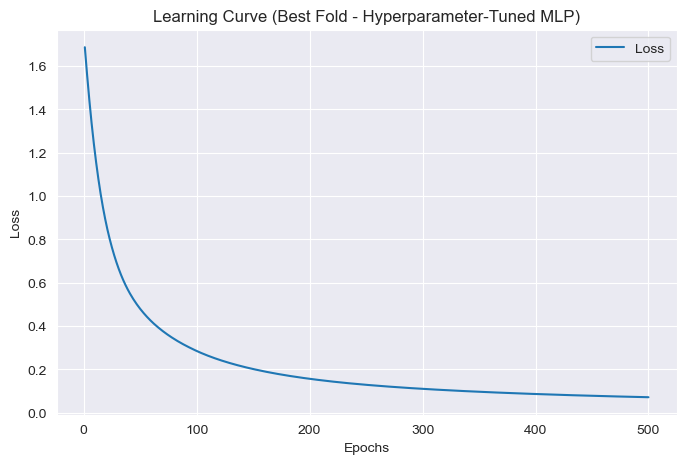


K-Fold CV results for Hyperparameter-Tuned MLP stored in 'kfold_results_mlp_tuned'.


In [12]:
# K-Fold CV for Hyperparameter-Tuned MLP
print("\nK-Fold CV for Hyperparameter-Tuned MLP:")

mlp_tuned_fold_results, mlp_tuned_loss_histories = kfold_cv(
    MLP,
    preprocessed_data["X_train"],
    preprocessed_data["y_train"],
    k=5,
    model_params={
        "architecture": [preprocessed_data["X_train"].shape[1], 32, 16, num_classes],
        "learning_rate": 0.01,
        "epochs": 500
    },
    hyperparams=tuned_mlp_results["best"]  # Best-tuned results from previous experiments
)

# Identify the best fold based on accuracy
best_fold = max(mlp_tuned_fold_results, key=lambda x: x["accuracy"])

# Compute detailed metrics for the best fold
from sklearn.metrics import precision_recall_fscore_support

y_val_true = preprocessed_data["y_train"][best_fold["val_indices"]]
y_val_pred = best_fold["y_pred_val"]

precision, recall, f1, _ = precision_recall_fscore_support(
    y_val_true,
    y_val_pred,
    labels=np.arange(len(preprocessed_data["label_encoder"].classes_)),
    zero_division=0
)
class_names = preprocessed_data["label_encoder"].classes_

# Create a DataFrame for detailed metrics
metrics_df = pd.DataFrame({
    'Class': class_names,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

print("\nBest Fold Metrics (Hyperparameter-Tuned MLP):")
print(f"Fold: {best_fold['fold']}")
print(f"Accuracy: {best_fold['accuracy']:.4f}")
print(f"Confusion Matrix:\n{best_fold['confusion_matrix']}")
print("\nDetailed Metrics for Best Fold:\n", metrics_df)

# Visualize the best fold's learning curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(best_fold["loss_history"]) + 1), best_fold["loss_history"], label="Loss")
plt.title(f"Learning Curve (Best Fold - Hyperparameter-Tuned MLP)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

print("\nK-Fold CV results for Hyperparameter-Tuned MLP stored in 'kfold_results_mlp_tuned'.")


In [13]:
from sklearn.metrics import precision_recall_fscore_support

print("===== Final Analysis and Summary =====\n")

# 1. Basic Perceptron Results - Experiment 1
print("Experiment 1: Basic Perceptron Results")
print(f"Validation Accuracy: {sigmoid_results['best_accuracy']:.4f}")
print(f"Confusion Matrix:\n{sigmoid_results['confusion_matrix']}")
print("Detailed Metrics:")
print(sigmoid_results['metrics'])
print("\nBest K-Fold Result for Basic Perceptron:")
print(f"Average Accuracy across 5 folds: {np.mean([result['accuracy'] for result in perceptron_fold_results]):.4f}")
best_perceptron_fold = max(perceptron_fold_results, key=lambda x: x["accuracy"])
print(f"Best Fold Accuracy: {best_perceptron_fold['accuracy']:.4f}")
print(f"Confusion Matrix:\n{best_perceptron_fold['confusion_matrix']}")
print("Detailed Metrics for Best Fold:")
print(pd.DataFrame({
    'Class': class_names,
    'Precision': precision_recall_fscore_support(
        preprocessed_data["y_train"][best_perceptron_fold["val_indices"]],
        best_perceptron_fold["y_pred_val"],
        labels=np.arange(len(class_names)),
        zero_division=0
    )[0],
    'Recall': precision_recall_fscore_support(
        preprocessed_data["y_train"][best_perceptron_fold["val_indices"]],
        best_perceptron_fold["y_pred_val"],
        labels=np.arange(len(class_names)),
        zero_division=0
    )[1],
    'F1-Score': precision_recall_fscore_support(
        preprocessed_data["y_train"][best_perceptron_fold["val_indices"]],
        best_perceptron_fold["y_pred_val"],
        labels=np.arange(len(class_names)),
        zero_division=0
    )[2]
}))
print("\n")

# 2. Hyperparameter-Tuned Perceptron Results - Experiment 2
print("Experiment 2: Hyperparameter-Tuned Perceptron Results")
print(f"Validation Accuracy: {best_sigmoid_results['accuracy']:.4f}")
print(f"Confusion Matrix:\n{best_sigmoid_results['confusion_matrix']}")
print("Detailed Metrics:")
print(best_sigmoid_results['metrics'])
print("\nBest K-Fold Result for Hyperparameter-Tuned Perceptron:")
print(f"Average Accuracy across 5 folds: {np.mean([result['accuracy'] for result in perceptron_tuned_fold_results]):.4f}")
best_tuned_perceptron_fold = max(perceptron_tuned_fold_results, key=lambda x: x["accuracy"])
print(f"Best Fold Accuracy: {best_tuned_perceptron_fold['accuracy']:.4f}")
print(f"Confusion Matrix:\n{best_tuned_perceptron_fold['confusion_matrix']}")
print("Detailed Metrics for Best Fold:")
print(pd.DataFrame({
    'Class': class_names,
    'Precision': precision_recall_fscore_support(
        preprocessed_data["y_train"][best_tuned_perceptron_fold["val_indices"]],
        best_tuned_perceptron_fold["y_pred_val"],
        labels=np.arange(len(class_names)),
        zero_division=0
    )[0],
    'Recall': precision_recall_fscore_support(
        preprocessed_data["y_train"][best_tuned_perceptron_fold["val_indices"]],
        best_tuned_perceptron_fold["y_pred_val"],
        labels=np.arange(len(class_names)),
        zero_division=0
    )[1],
    'F1-Score': precision_recall_fscore_support(
        preprocessed_data["y_train"][best_tuned_perceptron_fold["val_indices"]],
        best_tuned_perceptron_fold["y_pred_val"],
        labels=np.arange(len(class_names)),
        zero_division=0
    )[2]
}))
print("\n")

# 3. Basic MLP Results - Experiment 3
print("Experiment 3: Basic MLP Results")
print(f"Validation Accuracy: {mlp_results['best_accuracy']:.4f}")
print(f"Confusion Matrix:\n{mlp_results['confusion_matrix']}")
print("Detailed Metrics:")
# Compute metrics for MLP as they were not stored in `mlp_results`
precision, recall, f1, _ = precision_recall_fscore_support(
    preprocessed_data["y_val"],
    mlp.predict(preprocessed_data["X_val"]),
    labels=np.arange(len(class_names)),
    zero_division=0
)
mlp_metrics_df = pd.DataFrame({
    'Class': class_names,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})
print(mlp_metrics_df)
print("\nBest K-Fold Result for Basic MLP:")
print(f"Average Accuracy across 5 folds: {np.mean([result['accuracy'] for result in mlp_fold_results]):.4f}")
best_mlp_fold = max(mlp_fold_results, key=lambda x: x["accuracy"])
print(f"Best Fold Accuracy: {best_mlp_fold['accuracy']:.4f}")
print(f"Confusion Matrix:\n{best_mlp_fold['confusion_matrix']}")
print("Detailed Metrics for Best Fold:")
print(pd.DataFrame({
    'Class': class_names,
    'Precision': precision_recall_fscore_support(
        preprocessed_data["y_train"][best_mlp_fold["val_indices"]],
        best_mlp_fold["y_pred_val"],
        labels=np.arange(len(class_names)),
        zero_division=0
    )[0],
    'Recall': precision_recall_fscore_support(
        preprocessed_data["y_train"][best_mlp_fold["val_indices"]],
        best_mlp_fold["y_pred_val"],
        labels=np.arange(len(class_names)),
        zero_division=0
    )[1],
    'F1-Score': precision_recall_fscore_support(
        preprocessed_data["y_train"][best_mlp_fold["val_indices"]],
        best_mlp_fold["y_pred_val"],
        labels=np.arange(len(class_names)),
        zero_division=0
    )[2]
}))
print("\n")

# 4. Hyperparameter-Tuned MLP Results - Experiment 4
print("Experiment 4: Hyperparameter-Tuned MLP Results")
print(f"Validation Accuracy: {tuned_mlp_results['best']['accuracy']:.4f}")
print(f"Confusion Matrix:\n{tuned_mlp_results['best']['confusion_matrix']}")
print("Detailed Metrics:")
print(tuned_mlp_results['best']['metrics'])
print("\nBest K-Fold Result for Hyperparameter-Tuned MLP:")
print(f"Average Accuracy across 5 folds: {np.mean([result['accuracy'] for result in mlp_tuned_fold_results]):.4f}")
best_tuned_mlp_fold = max(mlp_tuned_fold_results, key=lambda x: x["accuracy"])
print(f"Best Fold Accuracy: {best_tuned_mlp_fold['accuracy']:.4f}")
print(f"Confusion Matrix:\n{best_tuned_mlp_fold['confusion_matrix']}")
print("Detailed Metrics for Best Fold:")
print(pd.DataFrame({
    'Class': class_names,
    'Precision': precision_recall_fscore_support(
        preprocessed_data["y_train"][best_tuned_mlp_fold["val_indices"]],
        best_tuned_mlp_fold["y_pred_val"],
        labels=np.arange(len(class_names)),
        zero_division=0
    )[0],
    'Recall': precision_recall_fscore_support(
        preprocessed_data["y_train"][best_tuned_mlp_fold["val_indices"]],
        best_tuned_mlp_fold["y_pred_val"],
        labels=np.arange(len(class_names)),
        zero_division=0
    )[1],
    'F1-Score': precision_recall_fscore_support(
        preprocessed_data["y_train"][best_tuned_mlp_fold["val_indices"]],
        best_tuned_mlp_fold["y_pred_val"],
        labels=np.arange(len(class_names)),
        zero_division=0
    )[2]
}))
print("\n")


===== Final Analysis and Summary =====

Experiment 1: Basic Perceptron Results
Validation Accuracy: 0.9600
Confusion Matrix:
[[22  0  0]
 [ 2  8  0]
 [ 0  0 18]]
Detailed Metrics:
       Class  Precision  Recall  F1-Score
0     Adelie   0.916667     1.0  0.956522
1  Chinstrap   1.000000     0.8  0.888889
2     Gentoo   1.000000     1.0  1.000000

Best K-Fold Result for Basic Perceptron:
Average Accuracy across 5 folds: 0.9183
Best Fold Accuracy: 0.9787
Confusion Matrix:
[[17  0  0]
 [ 1  8  0]
 [ 0  0 21]]
Detailed Metrics for Best Fold:
       Class  Precision    Recall  F1-Score
0     Adelie   0.944444  1.000000  0.971429
1  Chinstrap   1.000000  0.888889  0.941176
2     Gentoo   1.000000  1.000000  1.000000


Experiment 2: Hyperparameter-Tuned Perceptron Results
Validation Accuracy: 0.9800
Confusion Matrix:
[[22  0  0]
 [ 1  9  0]
 [ 0  0 18]]
Detailed Metrics:
       Class  Precision  Recall  F1-Score
0     Adelie   0.956522     1.0  0.977778
1  Chinstrap   1.000000     0.9  0.9473